In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from tabulate import tabulate
import math
from scipy.stats import norm

import warnings
warnings.filterwarnings("ignore")

# yahoo_finance is used to fetch data 
import yfinance as yf

In [2]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

one_yr_ago = datetime.now() - relativedelta(years=1)
one_yr_ago = one_yr_ago.strftime("%Y-%m-%d")

In [3]:
start = one_yr_ago 
end = datetime.now().strftime("%Y-%m-%d")
symbols = ['FDS','INVH', 'ROL', 'RBLX', 'HIG']

In [4]:
df_all = yf.download(symbols, start, end)

[*********************100%***********************]  5 of 5 completed


In [5]:
df = yf.download(symbols, start, end)['Adj Close']

[*********************100%***********************]  5 of 5 completed


In [6]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode
init_notebook_mode(connected=True)

# FDS stock data

In [7]:
# download the data
df_fds = yf.download('FDS', start, end)

[*********************100%***********************]  1 of 1 completed


In [8]:

fig = make_subplots(rows=2,
                    cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0.1,
                    subplot_titles=('FDS', 'Volume'),
                    row_width=[0.3, 0.7])
# candlestick
fig.add_trace(
    go.Candlestick(
        x=df_fds.index,
        open=df_fds.Open,
        high=df_fds.High,
        low=df_fds.Low,
        close=df_fds.Close,
        showlegend=False),
    row=1,
    col=1
)

# volume
fig.add_trace(
    go.Bar(x=df_fds.index,
           y=df_fds.Volume,
           showlegend=False
          ),row=2,
    col=1
)


plotly.offline.iplot(fig, filename='jupyter-parametric_plot')

# INVH

In [14]:
# download the data
df_INVH = yf.download('INVH', start, end)

[*********************100%***********************]  1 of 1 completed


In [16]:
fig = make_subplots(rows=2,
                    cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0.1,
                    subplot_titles=('INVH', 'Volume'),
                    row_width=[0.3, 0.7])
# candlestick
fig.add_trace(
    go.Candlestick(
        x=df_INVH.index,
        open=df_INVH.Open,
        high=df_INVH.High,
        low=df_INVH.Low,
        close=df_INVH.Close,
        showlegend=False),
    row=1,
    col=1
)

# volume
fig.add_trace(
    go.Bar(x=df_INVH.index,
           y=df_INVH.Volume,
           showlegend=False
          ),row=2,
    col=1
)


plotly.offline.iplot(fig, filename='jupyter-parametric_plot')

# ROL

In [17]:
# download the data
df_ROL = yf.download('ROL', start, end)

[*********************100%***********************]  1 of 1 completed


In [18]:
fig = make_subplots(rows=2,
                    cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0.1,
                    subplot_titles=('ROL', 'Volume'),
                    row_width=[0.3, 0.7])
# candlestick
fig.add_trace(
    go.Candlestick(
        x=df_ROL.index,
        open=df_ROL.Open,
        high=df_ROL.High,
        low=df_ROL.Low,
        close=df_ROL.Close,
        showlegend=False),
    row=1,
    col=1
)

# volume
fig.add_trace(
    go.Bar(x=df_ROL.index,
           y=df_ROL.Volume,
           showlegend=False
          ),row=2,
    col=1
)


plotly.offline.iplot(fig, filename='jupyter-parametric_plot')

# RBLX 

In [21]:
# download the data
df_RBLX = yf.download('RBLX', start, end)

[*********************100%***********************]  1 of 1 completed


In [22]:
fig = make_subplots(rows=2,
                    cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0.1,
                    subplot_titles=('RBLX', 'Volume'),
                    row_width=[0.3, 0.7])
# candlestick
fig.add_trace(
    go.Candlestick(
        x=df_RBLX.index,
        open=df_RBLX.Open,
        high=df_RBLX.High,
        low=df_RBLX.Low,
        close=df_RBLX.Close,
        showlegend=False),
    row=1,
    col=1
)

# volume
fig.add_trace(
    go.Bar(x=df_RBLX.index,
           y=df_RBLX.Volume,
           showlegend=False
          ),row=2,
    col=1
)


plotly.offline.iplot(fig, filename='jupyter-parametric_plot')

# HIG

In [24]:
# download the data
df_HIG = yf.download('HIG', start, end)

[*********************100%***********************]  1 of 1 completed


In [25]:
fig = make_subplots(rows=2,
                    cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0.1,
                    subplot_titles=('HIG', 'Volume'),
                    row_width=[0.3, 0.7])
# candlestick
fig.add_trace(
    go.Candlestick(
        x=df_HIG.index,
        open=df_HIG.Open,
        high=df_HIG.High,
        low=df_HIG.Low,
        close=df_HIG.Close,
        showlegend=False),
    row=1,
    col=1
)

# volume
fig.add_trace(
    go.Bar(x=df_HIG.index,
           y=df_HIG.Volume,
           showlegend=False
          ),row=2,
    col=1
)


plotly.offline.iplot(fig, filename='jupyter-parametric_plot')

# FDS trades a lot Higher and has more volitality

<Axes: xlabel='Date'>

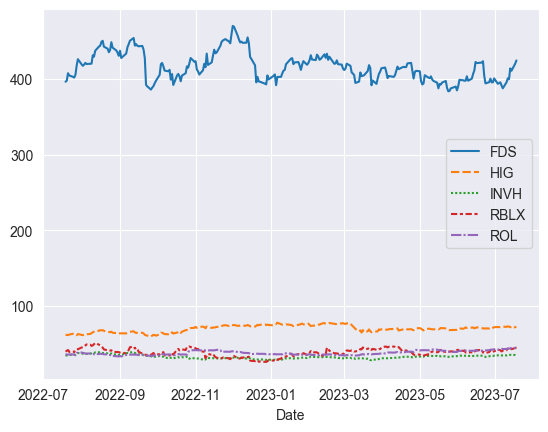

In [26]:
sns.set_style("darkgrid")
sns.lineplot(data = df)

# ROL, INVH and FDS have left skewness while HIG and RBLX skew (slightly) towards higher values

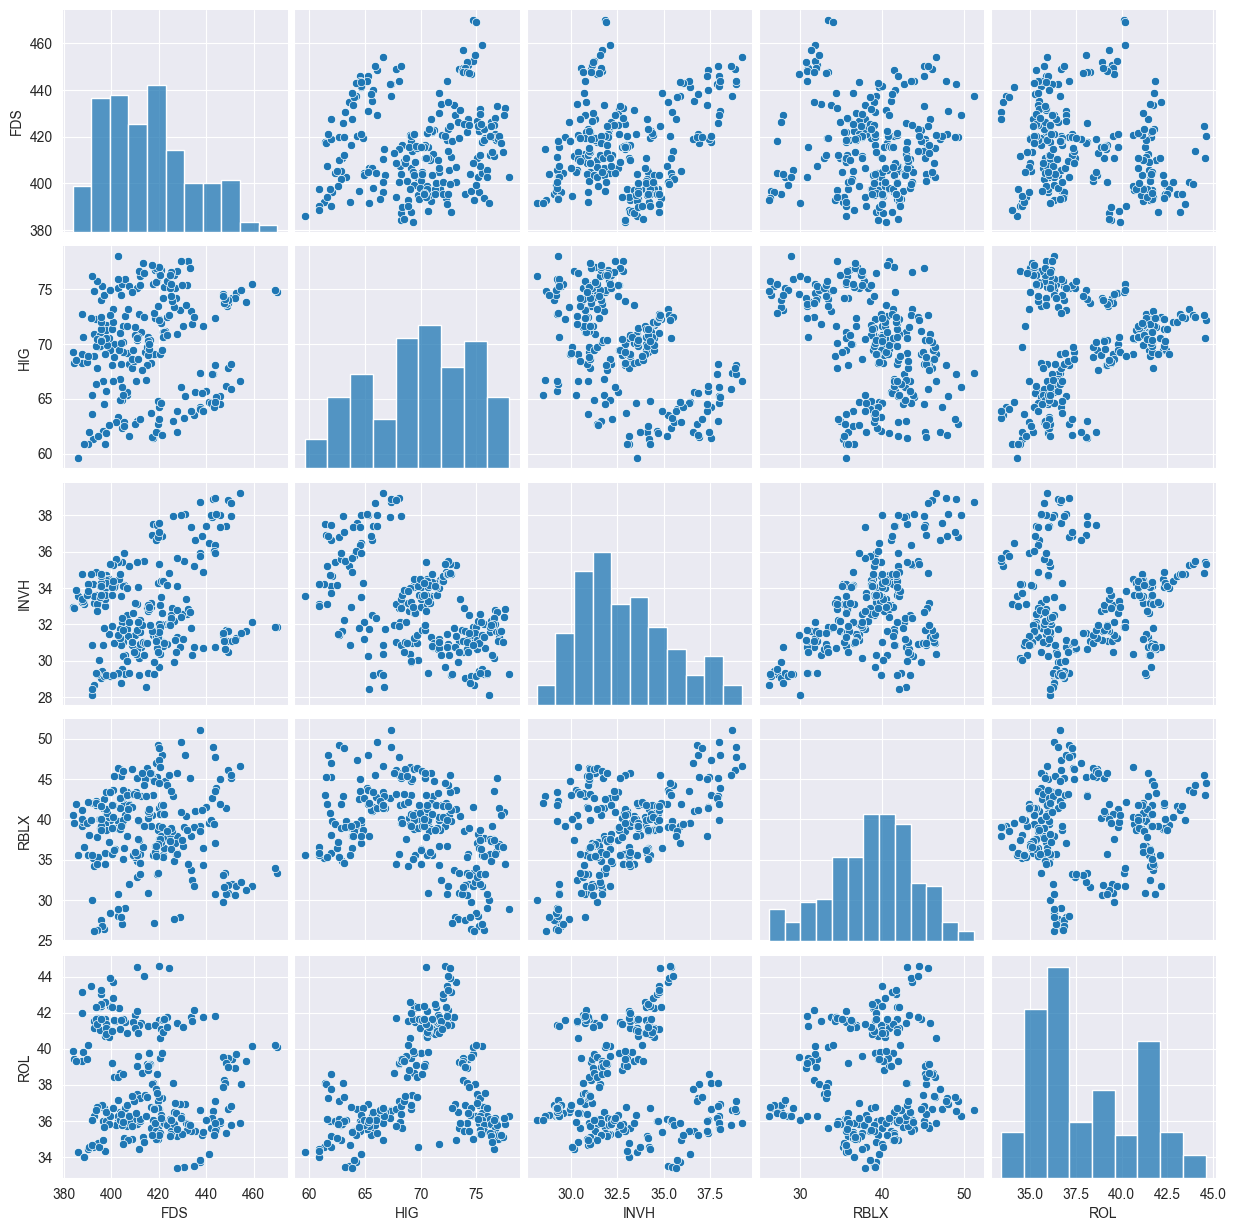

In [27]:
sns.pairplot(df)

# ROL and HIG have very variable densities, with ROL almost seperating into two distributions

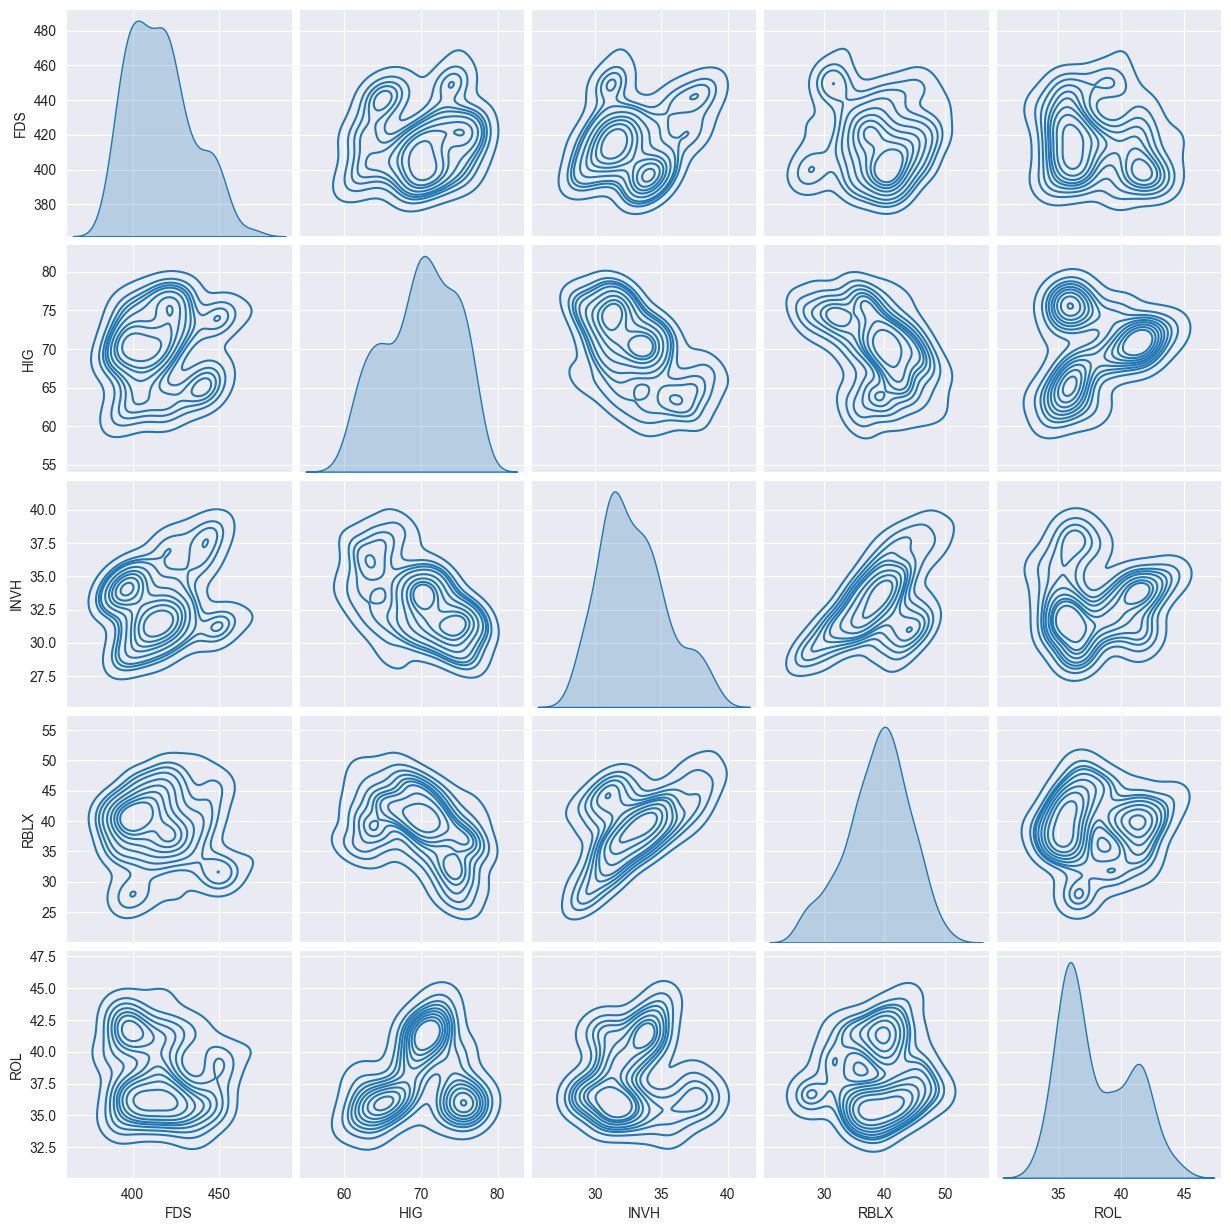

In [28]:
sns.pairplot(df, kind="kde")

# INVH and HIG are highly correlated 

<Axes: >

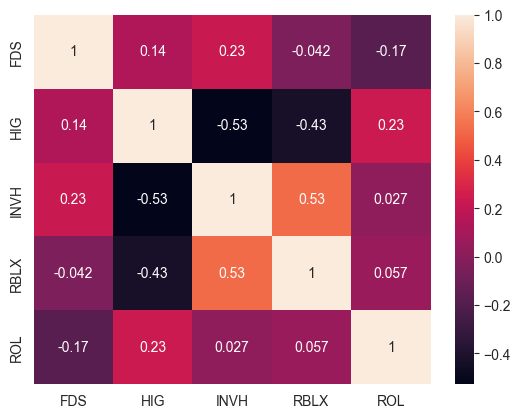

In [29]:
sns.heatmap(df.corr(), annot=True)

# Take a look at the overall report for more details 

In [30]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Profiling Report")

In [ ]:
profile.to_file("report.html")

In [31]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]